In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

Path = os.getcwd()

In [3]:
#distance = [20.125, 27.28125, 31.9375, 38.84375, 45.40625, 52.3125, 57.40625, 66.34375, 79.875] #in inches
distance = [0.511175, 0.69294375, 0.8112125, 0.98663125,
            1.15331875, 1.3287375, 1.45811875, 1.68513125, 2.028825] #in meters

offset = [13.2, 15.2, 16, 17.2, 18.8, 19.6, 21.2, 22.8, 25.2] #in nano-seconds

distance_error = [0.0015875000619614,0.0015875000619614,0.0015875000619614,0.0015875000619614,
                 0.0015875000619614,0.0015875000619614,0.0015875000619614,0.0015875000619614,
                 0.0015875000619614]

offset_error=[0.43, 0.3, 0.24, 0.2, 0.3, 0.35, 0.2, 0.15, 0.2]

c = 299792458

In [13]:
#Now finding the residuals of the reactance
slope, intercept = np.polyfit(distance,offset, 1)

expected = []
residuals = []
for i in range(len(distance)):
    expected.append(distance[i]* slope + intercept)
    residuals.append((expected[i]-offset[i])) 
xrange = np.linspace(0.3,2.2,80)

expected=np.array(expected)

#Finding the Best Fit Line
y = xrange*slope + intercept

In [12]:
def Standard_error(x, y, y_predict):
    """"
    x y and y_predict must all be arrays with the same number of elements.
    Returns the error of the slope.
    """  
    
    n = len(x)
    x_avg = np.mean(x)
    top = np.sum((y-y_predict)**2)
    bot = np.sum((x-x_avg)**2)
    result  = np.sqrt(1/(n-2) * top/bot)
    return(result)

In [17]:
err = Standard_error(distance,offset,expected)

In [20]:
slope

7.798885163101055

In [22]:
err #Used the error propigation calculator online to solve for err_c ((2.3/slope)*1e9)

0.18643962136944328

In [23]:
measured_c = (2.3/slope) *1e9
err_c = 7050192.800854899
print("We measured the speed of light to be "+str(round(measured_c,3))+" m/s")
print("This has an error of "+str(round(err_c,3))+" m/s")
print("This measurement is off the actual speed of light by "+str(round(((measured_c-c)/c)*100,3))+"%")

We measured the speed of light to be 294913946.276 m/s
This has an error of 7050192.801 m/s
This measurement is off the actual speed of light by -1.627%


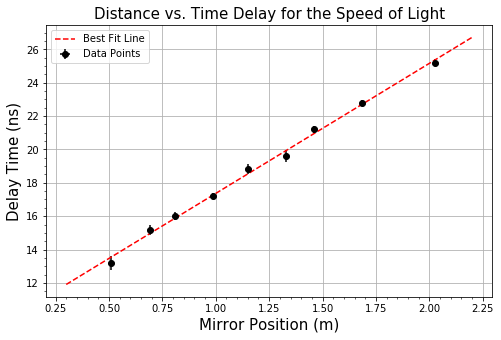

In [8]:
plt.figure(figsize = [8,5])
plt.errorbar(distance,offset,xerr= distance_error,yerr = offset_error,fmt='o', color = 'black',label='Data Points')
plt.plot(xrange,y,'--',c='red',label='Best Fit Line')
plt.legend()
plt.grid()
plt.xlabel("Mirror Position (m)", size = 15)
plt.ylabel("Delay Time (ns)", size = 15)
plt.title("Distance vs. Time Delay for the Speed of Light", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/Speed of Light data",bbox_inches='tight')
plt.show()

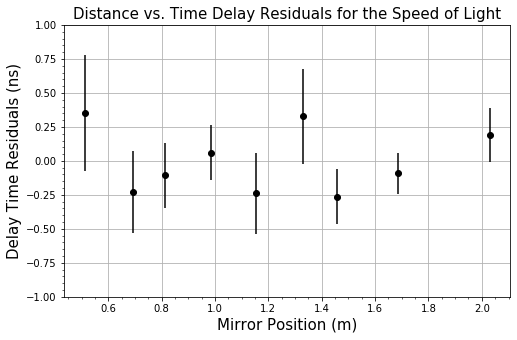

In [11]:
plt.figure(figsize = [8,5])
plt.errorbar(distance,residuals,xerr=distance_error,yerr=offset_error,fmt ='o',color = 'black')
plt.grid()
plt.xlabel("Mirror Position (m)", size = 15)
plt.ylabel("Delay Time Residuals (ns)", size = 15)
plt.title("Distance vs. Time Delay Residuals for the Speed of Light", size = 15)
plt.minorticks_on()
plt.ylim(-1,1)
plt.savefig(Path + "/Speed of light Residuals.png",bbox_inches='tight')
plt.show()

In [310]:
np.sum(residuals)

-1.2434497875801753e-14